In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/PhiPhuongUyen/Team-5/main/marketing_campaign.csv"
df= pd.read_csv(url, sep="\t")
pysqldf = lambda q: sqldf(q, globals())
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [6]:
df1=pysqldf("SELECT ID, Year_Birth, Income, Dt_Customer, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth\
             FROM df")

print(df1)

         ID  Year_Birth   Income Dt_Customer  MntWines  MntFruits  \
0      5524        1957  58138.0  04-09-2012       635         88   
1      2174        1954  46344.0  08-03-2014        11          1   
2      4141        1965  71613.0  21-08-2013       426         49   
3      6182        1984  26646.0  10-02-2014        11          4   
4      5324        1981  58293.0  19-01-2014       173         43   
...     ...         ...      ...         ...       ...        ...   
2235  10870        1967  61223.0  13-06-2013       709         43   
2236   4001        1946  64014.0  10-06-2014       406          0   
2237   7270        1981  56981.0  25-01-2014       908         48   
2238   8235        1956  69245.0  24-01-2014       428         30   
2239   9405        1954  52869.0  15-10-2012        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6  

In [7]:

df1["Spent"] = df1["MntWines"]+ df1["MntFruits"]+ df1["MntMeatProducts"]+ df1["MntFishProducts"]+ df1["MntSweetProducts"]+ df1["MntGoldProds"]
df1=df1.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
to_drop = ["ID"]
df1 = df1.drop(to_drop, axis=1)

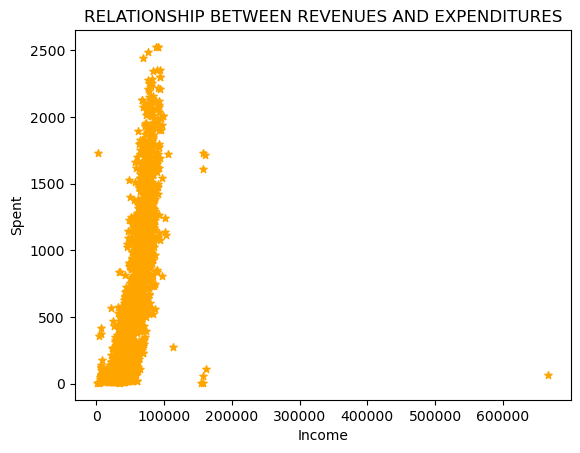

In [13]:
dfscatters=df1[['Income','Spent']]
plt.scatter(dfscatters['Income'], dfscatters['Spent'], color='orange', s=30, marker='*')

plt.ylabel("Spent")
plt.xlabel("Income")
plt.title("RELATIONSHIP BETWEEN REVENUES AND EXPENDITURES")
plt.show()